In [1]:
import os
import json
from pathlib import Path

import torch

import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from dotenv import load_dotenv
from scipy.ndimage import rotate
from yolov5.models.common import Detections

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

%matplotlib inline



/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data_dir = Path(os.getenv('DATASET_DIR')) / 'phase-2'
data_dir


PosixPath('/Users/lucyxu/PycharmProjects/datasets/phase-2')

In [3]:
image_paths = list(data_dir.glob('00008026.jpg'))
image_path = image_paths[0]
image_name = image_path

image_path.name


'00008026.jpg'

(1175, 2378, 3)


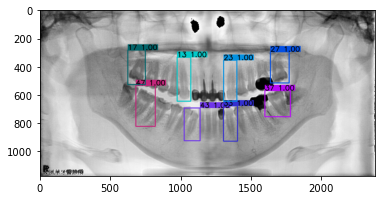

In [102]:
img = cv.imread(image_name)
label_name = image_name.with_suffix('.json')

with open(label_name, 'r') as f:
    label_file = json.load(f)

target_range = [''.join(i) for i in zip('11223344', '37' * 4)]
names = {i: v for i, v in enumerate(target_range)}
names_reverse = {v: i for i, v in enumerate(target_range)}

xyxy = []
for shape in label_file['shapes']:
    label = shape['label']
    if label not in target_range:
        continue

    temp = np.hstack(shape['points'] + [1] + [names_reverse[label]])
    temp = torch.from_numpy(temp)
    xyxy.append(temp)

imgs = [img]
pred = [torch.stack(xyxy)]
files = [image_name.name]

result = Detections(
    imgs=imgs,
    pred=pred,
    files=files,
    names=names,
)

a = result.render()
plt.imshow(1 - a[0])
plt.show()
